In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

In [2]:
df = pd.read_csv("./data/processed_movie_data.csv", delimiter=';', encoding='utf-8')
df

,budget,genres,imdb_id,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,vote_average,vote_count,overview_length,sentiment,year,month,weekday,genre_id
0,30000000.0,Animation,tt0114709,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,1.0,1.0,1995-10-30,373554033.0,81.0,1.0,7.7,5415.0,303,0.112121,1995,10,0,0
1,65000000.0,Adventure,tt0113497,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,3.0,1.0,1995-12-15,262797249.0,104.0,2.0,6.9,2413.0,395,-0.218750,1995,12,4,1
2,16000000.0,Comedy,tt0114885,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,1.0,1.0,1995-12-22,81452156.0,127.0,1.0,6.1,34.0,270,0.600000,1995,12,4,2
3,60000000.0,Action,tt0113277,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,3.0,1.0,1995-12-15,187436818.0,170.0,2.0,7.7,1886.0,335,-0.053571,1995,12,4,3
4,35000000.0,Action,tt0114576,Sudden Death,International action superstar Jean Claude Van...,5.231580,3.0,1.0,1995-12-22,64350171.0,106.0,1.0,5.5,174.0,448,-0.116667,1995,12,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4680,2196531.0,Comedy,tt0453365,FC Venus,"Pete is a football enthusiast, who plays as a ...",0.947509,1.0,1.0,2005-12-30,2411594.0,107.0,1.0,5.6,10.0,669,0.102083,2005,12,4,2
4681,12000000.0,Action,tt0479751,சிவாஜி,Corrupt police and politicians target a comput...,1.323587,1.0,1.0,2007-06-14,19000000.0,185.0,2.0,6.9,25.0,117,-0.055556,2007,6,3,3
4682,800000.0,Comedy,tt0933361,Dikari,"The sea, August, interesting and simple people...",0.903061,0.0,0.0,2006-11-23,1328612.0,100.0,1.0,5.8,6.0,378,0.380000,2006,11,3,2
4683,2000000.0,Romance,tt1718881,Про любоff,"У девушки Даши, приехавшей с подругой «покорят...",0.121844,1.0,1.0,2010-09-30,1268793.0,107.0,1.0,4.0,3.0,534,0.000000,2010,9,3,9


In [3]:
cols = ["budget", "popularity", "production_companies", 
        "production_countries", "revenue", "runtime", 
        "spoken_languages", "vote_average", "vote_count",
        "overview_length", "sentiment", "year",
        "month", "weekday", "genre_id"]

In [4]:
X = df[cols].to_numpy()
X

array([[3.0000000e+07, 2.1946943e+01, 1.0000000e+00, ..., 1.0000000e+01,
        0.0000000e+00, 0.0000000e+00],
       [6.5000000e+07, 1.7015539e+01, 3.0000000e+00, ..., 1.2000000e+01,
        4.0000000e+00, 1.0000000e+00],
       [1.6000000e+07, 3.8594950e+00, 1.0000000e+00, ..., 1.2000000e+01,
        4.0000000e+00, 2.0000000e+00],
       ...,
       [8.0000000e+05, 9.0306100e-01, 0.0000000e+00, ..., 1.1000000e+01,
        3.0000000e+00, 2.0000000e+00],
       [2.0000000e+06, 1.2184400e-01, 1.0000000e+00, ..., 9.0000000e+00,
        3.0000000e+00, 9.0000000e+00],
       [5.0000000e+06, 3.9793000e-02, 0.0000000e+00, ..., 9.0000000e+00,
        3.0000000e+00, 3.0000000e+00]])

In [5]:
x_scaled = StandardScaler().fit_transform(X)
x_scaled

array([[-0.03024548,  2.2972633 , -0.88907563, ...,  0.88598387,
        -2.39985324, -1.32653348],
       [ 0.85058079,  1.42021392,  0.02597695, ...,  1.47571669,
         0.61909351, -1.02152713],
       [-0.38257598, -0.91958632, -0.88907563, ...,  1.47571669,
         0.61909351, -0.71652078],
       ...,
       [-0.76510625, -1.44538762, -1.34660191, ...,  1.18085028,
        -0.13564318, -0.71652078],
       [-0.73490649, -1.58432693, -0.88907563, ...,  0.59111746,
        -0.13564318,  1.41852365],
       [-0.65940709, -1.59891969, -1.34660191, ...,  0.59111746,
        -0.13564318, -0.41151443]])

In [6]:
pca = PCA(n_components=2)

In [7]:
pca_features = pca.fit_transform(x_scaled)

In [8]:
loadings = pca.components_
n_features = pca.n_features_in_
feature_names = cols
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
pc_loadings = dict(zip(pc_list, loadings))
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2
feature_names,,
budget,0.433040,0.049788
popularity,0.426776,-0.064137
production_companies,0.204604,0.520394
production_countries,0.127954,0.469433
revenue,0.469984,-0.131339
runtime,0.175837,-0.238604
spoken_languages,0.095781,0.057398
vote_average,0.170001,-0.376321
vote_count,0.482881,-0.130212


In [9]:
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=['PC1', 'PC2'])

In [10]:
pca_df_scaled = pca_df.copy()

In [11]:
scaler_df = pca_df[['PC1', 'PC2']]
scaler = 1 / (scaler_df.max() - scaler_df.min())

In [12]:
for index in scaler.index:
    pca_df_scaled[index] *= scaler[index]
pca_df_scaled

,PC1,PC2
0,0.225878,-0.144789
1,0.133626,-0.064029
2,-0.065411,-0.091260
3,0.145922,-0.126985
4,-0.049403,-0.004075
...,...,...
4680,-0.107115,-0.027672
4681,-0.037790,-0.073468
4682,-0.121389,-0.082691
4683,-0.129633,0.046212


In [13]:
import numpy as np
import seaborn as sns
sns.set()

In [14]:
xs = loadings[0]
ys = loadings[1]

In [15]:
colors = sns.color_palette("hls", len(cols))
colors[0]

(0.86, 0.3712, 0.33999999999999997)

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_50224/619304267.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(xs[i], ys[i], s=200, label=varnames, c=colors[i])


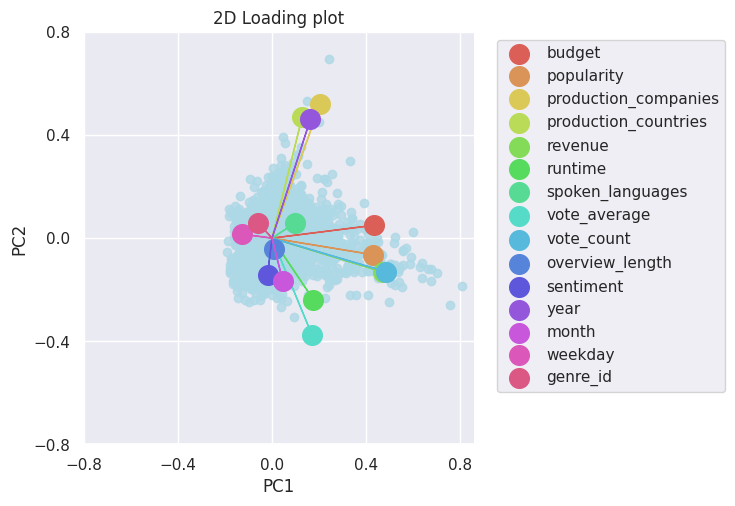

In [16]:
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df_scaled, 
    fit_reg=False,
    scatter_kws={"color" : "lightblue"}
)
for i, varnames in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200, label=varnames, c=colors[i])
    plt.arrow(
        0, 0, # coordinates of arrow base
        xs[i], # length of the arrow along x
        ys[i], # length of the arrow along y
        color=colors[i], 
        head_width=0.01
        )
    #plt.text(xs[i], ys[i], varnames)

xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('2D Loading plot')
plt.legend(bbox_to_anchor=(1.04, 1), loc="upper left")
plt.show()